## 项目: 机票航班延误预测

欢迎来到机票航班延误预测的实战项目！在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。
>**提示：**Code 和 Markdown 区域可通过**Shift + Enter**快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

我们知道，航班延误对于旅客、售卖机票的平台以及航空公司都是一个比较头疼的问题。造成航班延误的因素有很多，包括台风、雾霾、飞机故障、航空管制等等原因。在这个项目中，我们将探索在飞机起飞前2小时做航班延误预测这个实际问题，你将从实际问题出发，探索数据，抽取数据特征，构建模型并作出预测。

这个项目的数据来自[航班动态起降数据集](https://www.kesci.com/home/dataset/59793a5a0d84640e9b2fedd3)（数据集由和鲸社区提供），该数据集用2015年5月到2017年5月的机场情况作为训练集，用201年6月作为测试集。你可以通过报名该比赛获取数据集，另外，为了方便大家获取数据，我们也提供了一个[下载地址](https://static-documents.s3.cn-north-1.amazonaws.com.cn/nd101/MLND+documents/data.zip)，请下载后放置data文件夹中。

**数据说明：**


- ./data/2015年5月到2017年5月城市天气.csv
- ./data/2015年5月到2017年5月航班动态数据.csv
- ./data/2015年5月到2017年5月特情.xlsx
- ./data/机场城市对应表.xlsx


 运行下面区域的代码以载入一些此项目所需的Python库。如果成功返回提示语句，则说明载入成功。

In [1]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print('你已经成功载入所需要的库！')

你已经成功载入所需要的库！


## 数据初探

### 导入数据
我们先导入数据，然后观察头部数据。可以使用[read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html), [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) 分别加载对应格式的数据，然后使用[head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据。

In [2]:
# 文件路径 './data/2015年5月到2017年5月航班动态数据.csv'
# 注意使用字符编码 encoding="gb2312"
# TODO: 根据以上提示信息，导入航班数据
flight_data = pd.read_csv('./data/2015年5月到2017年5月航班动态数据.csv', encoding="gb2312")

# 文件路径 "./data/2015年5月到2017年5月城市天气.csv"
# TODO：根据以上提示信息，导入天气数据
weather = pd.read_csv('./data/2015年5月到2017年5月城市天气.csv' )

# 文件路径 "./data/机场城市对应表.xlsx"
# TODO：根据以上提示信息，导入城市与机场对应数据
airport_city = pd.read_excel('./data/机场城市对应表.xlsx', encoding="gb2312")

# 文件路径 "./data/2015年5月到2017年5月特情.xlsx"
# TODO：根据以上提示信息，导入特情数据
special = pd.read_excel('./data/2015年5月到2017年5月特情.xlsx', encoding="gb2312")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 观察数据
使用 [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)观察前5条数据。

In [3]:
# 观察航班数据
flight_data.head()  

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常


In [4]:
# 观察天气数据
weather.head()

,城市,天气,最低气温,最高气温,日期,Unnamed: 5
0,厦门,阴,21,26,2015-05-01,NaN
1,宁德,阵雨,19,25,2015-05-01,NaN
2,莆田,阵雨转阴,20,26,2015-05-01,NaN
3,泉州,阴,22,26,2015-05-01,NaN
4,漳州,阵雨转阴,22,28,2015-05-01,NaN


In [5]:
# 通过观察，发现有一列没有用的空表格 “Unnamed: 5”，你需要使用 `del` 将其从 `weather` 数据中删除
del weather["Unnamed: 5"]
weather.head()

,城市,天气,最低气温,最高气温,日期
0,厦门,阴,21,26,2015-05-01
1,宁德,阵雨,19,25,2015-05-01
2,莆田,阵雨转阴,20,26,2015-05-01
3,泉州,阴,22,26,2015-05-01
4,漳州,阵雨转阴,22,28,2015-05-01


In [6]:
# 观察城市与机场对应数据
airport_city.head()

,机场编码,城市名称
0,AHJ,阿坝
1,AYN,安阳
2,HSC,韶关
3,HCJ,河池
4,XNT,邢台


### <font color="orange">me 1: 数据目前没用到</font>

In [7]:
# 观察特情数据
special.head()   

,特情机场,收集时间,开始时间,结束时间,特情内容
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


#### 问题1：我们知道，一个有监督学习问题是总有一个需要预测的目标值，那么在这个问题中，你通过了解此问题的背景以及观察以上的数据，认为此任务中的目标值是什么？在已有的数据中，给出了预测目标值吗？如果没有的话，我们要如何获得这个目标值呢？

回答问题：
- 这是一个Classification的问题： 3小时内，航班会不会延误。 
- 延误target需要通过计算得到： 实际起飞时间和计划起飞时间的差值，如果大于3小时，即为延误。
- 延误大于3小时，target=1。 延误小于等于3小时，target=0


### 整理targets值

根据以上对数据的初步观察，我们发现，这样的实际问题的数据是非常不规整的。数据的targets标签并没有显式地给出，而是需要自己整理。在这一小节，我们根据飞行数据 `flight_data` 整理出我们需要的targets。

我们首先定义延误时间：实际起飞时间与计划起飞时间的差；然后，我们以延误时长是否超过3小时来定义targets。同时观察到“航班是否取消”这一列数据，针对数据中的“取消”的航班，我们直接可以将其延误时间设置成12小时。

**建议**：用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择延误时间是否超过三小时，如果超过三小时则延误目标值取1，否则延误目标值取0；另外也用[numpy.where](https://numpy.org/devdocs/reference/generated/numpy.where.html?highlight=where#numpy.where)按条件选择`flight_data['航班是否取消']`是否为 `取消`,如果是取消则直接可以将其延误时间设置成12小时。

In [8]:
# TODO：计算 起飞延误时间，以小时为单位，注意将单位秒转换为单位小时
flight_data['起飞延误时间'] = (flight_data['实际起飞时间'] - flight_data['计划起飞时间'])/3600
# flight_data['起飞延误时间'] = pd.to_datetime(flight_data['实际起飞时间'], unit='s',utc=True) - pd.to_datetime(flight_data['计划起飞时间'] ,unit='s',utc=True)


# TODO：`flight_data['航班是否取消']是否为 “取消”,如果是取消则直接可以将其延误时间设置成12小时
flight_data['起飞延误时间'] = np.where(flight_data['航班是否取消'] == '取消', 12, flight_data['起飞延误时间'])
flight_data['飞机延误目标'] = np.where(flight_data['起飞延误时间']>3, 1, 0)
flight_data.head(10)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,12.000000,1
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消,12.000000,1
7,NKG,HAK,GS6538,1452999900,1453010100,1.453005e+09,1.453014e+09,7.0,正常,1.316667,0
8,LZO,PEK,MU5709,1452910200,1452919800,1.452910e+09,1.452918e+09,8.0,正常,-0.133333,0
9,WEH,HGH,CA1788,1453708200,1453715100,1.453708e+09,1.453714e+09,9.0,正常,-0.100000,0


### 整理简单features

在课程中，所讲解的案例使用的是比较干净的数据集，然而在真实业务场景里，却很少有直接可用的数据，我们往往需要从复杂的数据中提取重要的特征来帮助我们解决实际问题。正如当前所做的项目，我们无法直接使用所有数据，而是需要进行数据归并、删选、提取重要的特征。

在整理完我们的目标值之后，我们可以开始进行特征工程。根据以上的几个文件，我们可以得到很多特征，在这里，我们先抽取一个简单的特征，学习一遍在处理实际数据时的特征工程流程。

我们所抽取的特征是 `weather`中的“天气”数据。但我们发现 `weather` 中的数据并不是直接可用的，而是需要我们将该天气数据按照日期和城市对齐至飞行数据`flight_data`中。具体来说，我们参考下面的图片![merge_data](./figure/merge_feature.png)

- 我们先要将天气 `weather`中的“城市”一列的数据，通过机场城市`airport_city`数据中的“城市名称”和“城市编码”，将 `weather`中的“城市”转化为“城市编码”，这样才能跟`flight_data`中的机场编码对应上。
- 然后我们要将 `weather`中的“日期”一列的数据对齐至`flight_data`中“计划起飞时间”上。但是，我们发现“计划起飞时间”是以秒为单位的浮点格式数据，因此我们还需要将“计划起飞时间”转换成和`weather`中的“日期”一样的时间格式。

接下来就是按以上的步骤进行操作

首先，利用 [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) ，按`airport_city`中的城市名称和城市编码，将 `weather`中的城市名称转化为城市编码。

In [9]:
weather.head()

,城市,天气,最低气温,最高气温,日期
0,厦门,阴,21,26,2015-05-01
1,宁德,阵雨,19,25,2015-05-01
2,莆田,阵雨转阴,20,26,2015-05-01
3,泉州,阴,22,26,2015-05-01
4,漳州,阵雨转阴,22,28,2015-05-01


In [10]:
airport_city.head()

,机场编码,城市名称
0,AHJ,阿坝
1,AYN,安阳
2,HSC,韶关
3,HCJ,河池
4,XNT,邢台


In [11]:
# TODO: 将机场编码对应到天气数据上面，根据城市名，注意 weather 数据是【城市】，而 airport_city 是【城市名称】
airport_weather = pd.merge(weather, airport_city, left_on=['城市'], right_on=['城市名称'], how='left')

# # 去除缺失值和重复的机场天气信息
airport_weather = airport_weather.dropna()
airport_weather = airport_weather.drop_duplicates(['日期','机场编码'])
airport_weather.head()

,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,厦门,阴,21,26,2015-05-01,XMN,厦门
5,龙岩,小雨转阴,20,26,2015-05-01,LCX,龙岩
6,三明,小雨,20,25,2015-05-01,SQJ,三明
8,南昌,小雨转中雨,22,27,2015-05-01,KHN,南昌
9,九江,雷阵雨转大雨,19,28,2015-05-01,JIU,九江


我们发现，数据`airport_weather`中的“日期”格式和`flight_data`中的“计划起飞时间”格式是不一致的，为了能够将机场天气数据`airport_weather`按照“日期”归并至飞行数据`flight_data`中，我们首先需要将`flight_data`中的“计划起飞时间”格式转化成年月日统一格式。可以先用[to_datetime](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)将浮点类型的数据转化为日期格式，然后再将日期格式的数据转化为 统一的 年月日格式。

In [12]:
# TODO：利用 to_datetime  浮点类型的数据转化为时间数据，单位为秒，utc时间为True
flight_data['计划起飞日期tmp'] = pd.to_datetime(flight_data['计划起飞时间'], unit='s',utc=True)

# flight_data['计划到达日期tmp'] = pd.to_datetime(flight_data['计划到达时间'], unit='s',utc=True)
# flight_data['实际起飞日期tmp'] = pd.to_datetime(flight_data['实际起飞时间'], unit='s',utc=True)
# flight_data['实际到达日期tmp'] = pd.to_datetime(flight_data['实际到达时间'], unit='s',utc=True)


# 再将日期格式的数据转化为 统一的 年月日格式。
flight_data['计划起飞日期'] = flight_data['计划起飞日期tmp'].apply(lambda x:x.strftime('%Y-%m-%d') if not(pd.isnull(x)) else None)
flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10


然后，再次利用[merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)，根据机场名称和日期信息，将机场天气`weather`数据对应到飞行数据 `flight_data` 中。注意，`flight_data`中是“出发机场”和“计划起飞日期”,而 `airport_weather`中对应的是“机场编码”和“日期”。

In [13]:
# TODO: merge flight_data 和 airport_weather
flight_data = pd.merge(flight_data, airport_weather, left_on=['出发机场','计划起飞日期'], right_on=['机场编码','日期'],how='left')


In [14]:
flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温,日期,机场编码,城市名称
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26,杭州,晴转阴,1,7,2016-01-26,HGH,杭州
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14,上海,多云,3,6,2016-01-14,SHA,上海
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26,广州,小雨转中雨,6,11,2016-01-26,CAN,广州
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06,上海,小雨转阴,5,9,2016-01-06,SHA,上海
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10,沈阳,晴,-20,-7,2016-01-10,SHE,沈阳


In [15]:
flight_data = flight_data.drop(['日期','机场编码','城市名称'],axis=1)
flight_data.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26,杭州,晴转阴,1,7
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14,上海,多云,3,6
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26,广州,小雨转中雨,6,11
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06,上海,小雨转阴,5,9
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10,沈阳,晴,-20,-7


## 建立简单模型

### 特征处理
我们可以先建立一个最简单的模型，从飞行数据`flight_data`中挑选2列数据作为features，其中一个是我们刚刚构造好的“天气”数据，另外一个feature由你来选择。注意，其中“飞机延误时间”和“飞机延误目标”并不是feature，而是targets，所以不能选择这两列作为features。

#### 问题2：你选择的特征是特征是什么？说说你选择这个feature的理由。

回答问题：

> 我选择的特征：计划起飞时间。某一航班可能因为机场流量控制,天气等原因导致实际时间晚于计划时间, 从而导致航班延误。机场在繁忙时段，也容易导致多个航班延误。

In [16]:
flight_data['计划起飞时间'] = flight_data['计划起飞日期tmp'].apply(lambda x: x.strftime('%H%M') if not (pd.isnull(x)) else None)

In [17]:
flight_data.head(10)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,起飞延误时间,飞机延误目标,计划起飞日期tmp,计划起飞日期,城市,天气,最低气温,最高气温
0,HGH,DLC,CZ6328,1200,1453817100,1.453813e+09,1.453819e+09,1.0,正常,0.966667,0,2016-01-26 12:00:00+00:00,2016-01-26,杭州,晴转阴,1,7
1,SHA,XMN,FM9261,0840,1452767100,1.452763e+09,1.452768e+09,2.0,正常,0.500000,0,2016-01-14 08:40:00+00:00,2016-01-14,上海,多云,3,6
2,CAN,WNZ,ZH9597,0935,1453807500,1.453802e+09,1.453807e+09,3.0,正常,0.400000,0,2016-01-26 09:35:00+00:00,2016-01-26,广州,小雨转中雨,6,11
3,SHA,ZUH,9C8819,2250,1452131100,1.452121e+09,1.452130e+09,4.0,正常,0.233333,0,2016-01-06 22:50:00+00:00,2016-01-06,上海,小雨转阴,5,9
4,SHE,TAO,TZ185,0410,1452406800,1.452400e+09,1.452404e+09,5.0,正常,0.250000,0,2016-01-10 04:10:00+00:00,2016-01-10,沈阳,晴,-20,-7
5,DLC,NNG,ZH953Z,0030,1452401700,NaN,NaN,6.0,取消,12.000000,1,2016-01-10 00:30:00+00:00,2016-01-10,大连,晴,-8,-1
6,HGH,SZX,CZ6327,0945,1452600900,NaN,NaN,NaN,取消,12.000000,1,2016-01-12 09:45:00+00:00,2016-01-12,杭州,阴,0,6
7,NKG,HAK,GS6538,0305,1453010100,1.453005e+09,1.453014e+09,7.0,正常,1.316667,0,2016-01-17 03:05:00+00:00,2016-01-17,南京,阴转晴,0,9
8,LZO,PEK,MU5709,0210,1452919800,1.452910e+09,1.452918e+09,8.0,正常,-0.133333,0,2016-01-16 02:10:00+00:00,2016-01-16,泸州,小雨转阴,6,9
9,WEH,HGH,CA1788,0750,1453715100,1.453708e+09,1.453714e+09,9.0,正常,-0.100000,0,2016-01-25 07:50:00+00:00,2016-01-25,威海,多云,-4,-2


In [18]:
# TODO: 选择一列数据作为feature
features = ["天气"]
# add_to_feature = "航班编号"  # 你选择的feature
# add_to_feature = "出发机场"
add_to_feature = "计划起飞时间"
features.append(add_to_feature)
data = flight_data[features]

data.head()

,天气,计划起飞时间
0,晴转阴,1200
1,多云,0840
2,小雨转中雨,0935
3,小雨转阴,2250
4,晴,0410


In [19]:
# TODO：从 flight_data 中取出目标"飞机延误目标"的值，numpy格式的值
targets = flight_data['飞机延误目标'].values

# train_data 的数据量和 targets 的数据量一定是相等的
assert len(data) == len(targets)

到这里，我们已经提取完并得到两个特征，但是现在的特征是非数值类型的，那么我们需要先对这些非数值类型的特征进行编码。

从上面的**数据探索**中的表中，我们可以看到有几个属性的每一条记录都是非数字的。通常情况下，学习算法期望输入是数字的，这要求非数字的特征（称为类别变量）被转换。转换类别变量的一种流行的方法是使用**独热编码**方案。独热编码为每一个非数字特征的每一个可能的类别创建一个_“虚拟”_变量。例如，假设`someFeature`有三个可能的取值`A`，`B`或者`C`，。我们将把这个特征编码成`someFeature_A`, `someFeature_B`和`someFeature_C`.

| 特征X |                    | 特征X_A | 特征X_B | 特征X_C |
| :-: |                            | :-: | :-: | :-: |
|  B  |  | 0 | 1 | 0 |
|  C  | ----> 独热编码 ----> | 0 | 0 | 1 |
|  A  |  | 1 | 0 | 0 |

因此，**独热编码**将会对特征进行扩维，例如上面对例子，将对单个特征`someFeature` 扩充成3个特征`someFeature_A`, `someFeature_B`和`someFeature_C`，这种独热编码，你可以参考one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) 解释和实现以及使用。

另一种对非数值类型对特征进行编码对方法是直接对字符编号，例如 `someFeature` 由 1.0、2.0、3.0 来作为特征值进入模型对计算。更进一步来说，这种方法如果类型比较多对话，将会导致特征空间太离散，影响模型对建模性能。于是我们需要对这些数值进行归一化，针对该问题，在我们实际业务场景中经常使用对解决方案是使用的编码方式是 [sklearn.preprocessing.LabelEncoder.fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)，它会将离散的字符映射到一个数值，用以表示该特征并参与模型计算。


#### 问题3：请参考文档简单介绍一下 `LabelEncoder.fit_transform`，说一下该方法和独热表示one-hot[get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)有什么区别，并根据刚刚构造好对`天气`特征包含对类别数量等统计信息来回答这里为什么用 `fit_transform`？

回答问题：

#### LabelEncoder.fit_transform 方法和独热表示one-hot get_dummies的区别: 
`标签编码LabelEncoder`:
 - LabelEncoder 将一列文本数据转化成数值。
 - 用来对分类型特征值进行编码，即对不连续的数值或文本进行编码。利用LabelEncoder将转换成连续的数值型变量。
 
 
 
`独热编码OneHotEncoder`: 
- 将一列文本数据转化成一列或多列只有0和1的数据。
- 对于离散的特征基本就是按照one-hot独热编码，该离散特征有多少取值，就用多少维来表示该特征。
- 有多少个状态就有多少比特，而且只有一个比特为1，其他全为0的一种码制。只是想让机器区分它们，并无大小区别。
- 大部分算法是基于向量空间中的度量来进行计算的，为了使非偏序关系的变量取值不具有偏序性，并且到圆点是等距的。使用one-hot编码，将离散特征的取值扩展到了欧式空间，离散特征的某个取值就对应欧式空间的某个点。将离散型特征使用one-hot编码，会让特征之间的距离计算更加合理。离散特征进行one-hot编码后，编码后的特征，其实每一维度的特征都可以看做是连续的特征。就可以跟对连续型特征的归一化方法一样，对每一维特征进行归一化。比如归一化到[-1,1]或归一化到均值为0,方差为1。
- 优点: 独热编码解决了分类器不好处理属性数据的问题，在一定程度上也起到了扩充特征的作用。它的值只有0和1，不同的类型存储在垂直的空间。
- 缺点: 当类别的数量很多时，特征空间会变得非常大。在这种情况下，一般可以用PCA来减少维度。而且one hot encoding+PCA这种组合在实际中也非常有用。 
- 适用：独热编码用来解决类别型数据的离散值问题，如果one-hot encoding的类别数目不太多，建议优先考虑。
- 不适用：将离散型特征进行one-hot编码的作用，是为了让距离计算更合理，但如果特征是离散的，并且不用one-hot编码就可以很合理的计算出距离，那么就没必要进行one-hot编码。 有些基于树的算法在处理变量时，并不是基于向量空间度量，数值只是个类别符号，即没有偏序关系，所以不用进行独热编码。 Tree Model不太需要one-hot编码： 对于决策树来说，one-hot的本质是增加树的深度。
 

`为什么用 fit_transform`: 
- fit():计算数据的参数，（均值），（标准差），并存储在对象中（例如实例化的CountVectorizer()等）。
- transform():将这些参数应用到数据集，进行标准化（尺度化）。
- fit_transform()：将前两种方法合并，fit + transform，然后对数据集使用。


判断数据中是否存在缺省值的情况，如果存在，请处理缺省值。

建议，你可以通过 `any(isnull())`[isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)去判断数据中是否存在缺失情况；然后通过[fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)去填补缺省值

In [20]:
data.groupby("天气").count()

,计划起飞时间
天气,
中到大雨,4
中到大雨转中雨,6
中到大雨转小雨,47
中度霾转雾,1432
中雨,64606
...,...
雾转阴,6067
雾转阵雨,1392
雾转阵雪,3


In [21]:
# TODO：判断并处理`data`中的缺省值
data.isnull().sum()

天气        122232
计划起飞时间         0
dtype: int64

In [22]:
data["天气"] = data["天气"].fillna('unknown')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data.head(12)

,天气,计划起飞时间
0,晴转阴,1200
1,多云,0840
2,小雨转中雨,0935
3,小雨转阴,2250
4,晴,0410
5,晴,0030
6,阴,0945
7,阴转晴,0305
8,小雨转阴,0210
9,多云,0750


In [24]:
data.dtypes

天气        object
计划起飞时间    object
dtype: object

In [25]:
data[add_to_feature]

0          1200
1          0840
2          0935
3          2250
4          0410
           ... 
7518633    2340
7518634    0725
7518635    0620
7518636    0330
7518637    0630
Name: 计划起飞时间, Length: 7518638, dtype: object

In [26]:
from sklearn import preprocessing
string_encoder = preprocessing.LabelEncoder()
# 我们首先对天气特征的进行编码
data["天气"] = string_encoder.fit_transform(data["天气"])

# TODO：对你选择的特征进行编码，如果你选择的是数值类型的特征，那么你可以按照前面所学知识进行归一化等处理
data[add_to_feature] = string_encoder.fit_transform(data[add_to_feature])


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
delay_ratio = targets.sum()/targets.size
delay_ratio 

0.07352648179098395

### 模型构建

现在我们可以根据上面构造好的feature和target来构建一个简单的模型。

- 第一步：使用`sklearn.model_selection.train_test_split`按**0.2**的测试比例切分训练集和测试集；
- 第二步：继续使用`sklearn.model_selection.train_test_split`按**0.2**的测试比例切分训练集和测试集；


In [28]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'data'和'targets'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size = 0.2, random_state = 0)

# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# 显示切分的结果
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Validation set has {} samples.".format(X_val.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 4811928 samples.
Validation set has 1202982 samples.
Testing set has 1503728 samples.


# -----------------------------------------------------------

### 监督学习模型
### 模型应用

你能够在 [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) 中选择以下监督学习模型
- 高斯朴素贝叶斯 (GaussianNB)
- 决策树 (DecisionTree)
- 集成方法 (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K近邻 (K Nearest Neighbors)
- 随机梯度下降分类器 (SGDC)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）



#### 问题4: 从上面的监督学习模型中选择两个适合我们这个问题的模型，并回答相应问题。然后从中选择一个先在我们等数据集上进行训练和测试，这一步是为了初步感受模型在此数据集上等表现。

#### 模型1

**模型名称**

回答：Random Forest


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：

`银行领域`: 随机森林算法可用于发现忠诚客户，客户经常从银行借贷并且按时还款，同样也能用于发现欺诈客户，即那些没有按时还款且行为异常的人。

`医疗领域`:随机森林算法能够用于识别医药中的不同成分是否以正确的方式组合在以前，也可通过分析患者的病历识别疾病。

`股市方面`:随机森林算法可以用于识别股票的波动行为，预估损失或收益。

`电子商务`: 随机森林算法可用于根据顾客的购物经历，预测他们是否喜欢系统推荐的商品。

**这个模型的优势是什么？他什么情况下表现最好？**

回答：

`优势`: 
- 防止过拟合： Random Forest 是在决策树上的一种集成算法。随机选择不同的特征和训练样本，生成大量的决策树。相对于决策树，Random Forest降低了overfitting，从而拥有更高的准确度。
- 并行：训练可以高度并行。
- feature选择： 在训练过程中，能够检测到feature间的互相影响，且可以得出feature的重要性，具有一定参考意义。

`最佳适用情况`: 
- feature： 能够处理很高维度（feature很多）的数据，并且不用做特征选择，对数据集的适应能力强：既能处理离散型数据，也能处理连续型数据，数据集无需规范化。可用于大数据集上。可以处理缺省值（单独作为一类），不用额外处理。
- 样本：当训练样本较多的情况下，适用。
- 当面对非线性数据时，适于作为基准模型。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：

`缺点`: 取值划分比较多的特征容易对 RF 的决策产生更大的影响，从而影响拟合的模型的效果。

`不宜适用情况`: 随机森林已经被证明在某些噪音较大的分类或回归问题上，RF会过拟合。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：我们希望对延误进行准确预测。当前的数据集，只有2个特征，特征取值划分比较多，对RF准确率的会产生影响。 但是，RF 在处理非线性分类问题时，可以作为基准模型，给出我们一个准确率不太差的模型，为今后的选择优化模型作参考。

#### 模型2

**模型名称**

回答：支撑向量机 (SVM)


**描述一个该模型在真实世界的一个应用场景。（你需要为此做点研究，并给出你的引用出处）**

回答：SVM 文本分类， 股票预测

**这个模型的优势是什么？他什么情况下表现最好？**

回答：

`优势`: 可用于线性/非线性分类（也可用于回归）。泛化准确率高。在样本量不太大的情况下也能有好的效果。计算开销小。

`最佳适用情况`: 

  - 线性不可分情况下，可适用非线性核，投射到高纬度进行划分。
  - 小样本情况下，高纬度问题。

**这个模型的缺点是什么？什么条件下它表现很差？**

回答：

`缺点`: 

- 对特征没有可解释性。对参数调节和函数的选择敏感，原始分类器不加调参仅适用二分类问题。
- 训练花费较长时间。在训练样本很大的情况下，不适用。

`不宜适用情况`: 
- 不适合大规模数据，计算量大，计算速度慢。
- 噪声太多的训练集，会影响分类结果。

**根据我们当前数据集的特点，为什么这个模型适合这个问题。**

回答：我们希望对延误进行准确预测。当前的数据集，只有2个特征，特征取值划分比较多，可使用非线性核，投射到高纬度进行分类。

https://www.zhihu.com/question/26726794

### 评价模型性能
在这一部分中，我们选择上面两个模型之一来训练。

在这个，分类预测问题中，我们使用**准确率**作为评价模型等标准，同时能够使用**F-beta score**作为评价指标，这样能够同时考虑查准率和查全率：

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


尤其是，当 $\beta = 0.5$ 的时候更多的强调查准率，这叫做**F$_{0.5}$ score** （或者为了简单叫做F-score）。


由于数据量比较大，模型训练可能需要一些时间来运行！

In [29]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

# TODO：从sklearn中导入上面你选择等一个监督学习模型
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### <font color="red">1. Decision Tree: 预测</font>

Train and valid successed. F-score     : 0.029370228165408893

Train and valid successed. F-score-beta: 0.23717685116648848

Train and valid successed. Acc         : 0.9268700612311739

Train and valid successed. Precision-score: 0.5779418150238819

Train and valid successed. Recall-score: 0.015067981388609014

In [39]:
dt_model = DecisionTreeClassifier(max_depth = 50, min_samples_leaf = 2, min_samples_split = 8, random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [40]:
dt_preds = dt_model.predict(X_val)
dt_preds

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
dt_preds.sum()

2303

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score

# TODO：在验证集 X_val, y_val 上预测并计算socre fbeta_score和accuracy_score

f_score         = f1_score(y_val, dt_preds)
f_score_beta    = fbeta_score(y_val, dt_preds, beta=0.2)
acc             = accuracy_score(y_val, dt_preds)
precision_score = precision_score(y_val, dt_preds)
recall_score    = recall_score(y_val, dt_preds)

# 打印 fbeta_score和accuracy_score
print("Train and valid successed. F-score     : {}".format(f_score))
print("Train and valid successed. F-score-beta: {}".format(f_score_beta))
print("Train and valid successed. Acc         : {}".format(acc))
print("Train and valid successed. Precision-score: {}".format(precision_score))
print("Train and valid successed. Recall-score: {}".format(recall_score))

Train and valid successed. F-score     : 0.029370228165408893
Train and valid successed. F-score-beta: 0.23717685116648848
Train and valid successed. Acc         : 0.9268700612311739
Train and valid successed. Precision-score: 0.5779418150238819
Train and valid successed. Recall-score: 0.015067981388609014


### <font color="red">2. Random Forest: 预测</font>

Train and valid successed. F-score     : 0.031239008090045726

Train and valid successed. F-score-beta: 0.2392751670897881

Train and valid successed. Acc         : 0.9267370584098515

Train and valid successed. Precision-score: 0.537646613696557

Train and valid successed. Recall-score: 0.016086853157936443

In [43]:
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split = 4, max_features='sqrt', random_state=42 )
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
rf_preds = rf_model.predict(X_val)
rf_preds

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
rf_preds.sum()

2643

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score

# TODO：在验证集 X_val, y_val 上预测并计算socre fbeta_score和accuracy_score

f_score         = f1_score(y_val, rf_preds)
f_score_beta    = fbeta_score(y_val, rf_preds, beta=0.2)
acc             = accuracy_score(y_val, rf_preds)
precision_score = precision_score(y_val, rf_preds)
recall_score    = recall_score(y_val, rf_preds)

# 打印 fbeta_score和accuracy_score
print("Train and valid successed. F-score     : {}".format(f_score))
print("Train and valid successed. F-score-beta: {}".format(f_score_beta))
print("Train and valid successed. Acc         : {}".format(acc))
print("Train and valid successed. Precision-score: {}".format(precision_score))
print("Train and valid successed. Recall-score: {}".format(recall_score))

Train and valid successed. F-score     : 0.031239008090045726
Train and valid successed. F-score-beta: 0.2392751670897881
Train and valid successed. Acc         : 0.9267370584098515
Train and valid successed. Precision-score: 0.537646613696557
Train and valid successed. Recall-score: 0.016086853157936443


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score
# TODO：在验证集 X_val, y_val 上预测并计算socre fbeta_score和accuracy_score

rf_f_score = f1_score(y_val, rf_preds)
rf_acc = accuracy_score(y_val, rf_preds)

dt_f_score = f1_score(y_val, dt_preds)
dt_acc = accuracy_score(y_val, dt_preds)

# 打印 fbeta_score和accuracy_score
print("DT - Train and valid successed. F-score: {}, Acc: {}".format(dt_f_score, dt_acc))
print("RF - Train and valid successed. F-score: {}, Acc: {}".format(rf_f_score, rf_acc))

DT - Train and valid successed. F-score: 0.029370228165408893, Acc: 0.9268700612311739
RF - Train and valid successed. F-score: 0.031239008090045726, Acc: 0.9267370584098515


#### 问题5： 用通俗的话解释模型

*用一到两段话，用外行也听得懂的话来解释最终模型是如何工作的。你需要解释所选模型的主要特点。例如，这个模型是怎样被训练的，它又是如何做出预测的。避免使用高级的数学或技术术语，不要使用公式或特定的算法名词。*

回答问题：
Random Forest: 基于Bagging算法。

`sample`: 随机从抽取特征和样本

`model`: 然后用多个模型（如：决策树）进行训练

`predict`: 在森林中的每个model给出各自的预测结果，最终投票决定最终结果

### 练习：模型调优
调节选择的模型的参数。使用网格搜索（GridSearchCV）来至少调整模型的重要参数（至少调整一个），这个参数至少需尝试3个不同的值。你要使用整个训练集来完成这个过程。在接下来的代码单元中，你需要实现以下功能：

- 导入[`sklearn.model_selection.GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) 和 [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- 初始化你选择的分类器，并将其存储在`clf`中。
 - 设置`random_state` (如果有这个参数)。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
 - **注意：** 如果你的学习器有 `max_features` 参数，请不要调节它！
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

**注意：** 取决于你选择的参数列表，下面实现的代码可能需要花一些时间运行！

In [48]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO：初始化分类器
# clf = RandomForestClassifier(random_state = 42)
clf = DecisionTreeClassifier()

# TODO：创建你希望调节的参数列表
parameters = {'max_depth':[20],'min_samples_split':[4,8,16]}

# TODO：创建一个fbeta_score打分对象
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = (clf.fit(X_train, y_train)).predict(X_val)
best_predictions = best_clf.predict(X_val)

In [49]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 特征重要性分析
在做数据分析过程中，我们需要分析抽取出来的特征对预测的贡献，以得出特征的重要性。特征重要性分析能够帮助我们继续进行相关的特征工程，比如过滤一些没有贡献的特征，加强一些比较重要的特征。


选择一个`scikit-learn`中有`feature_importance_`属性的监督学习分类器，这个属性是一个在做预测的时候根据所选择的算法来对特征重要性进行排序的功能。

在下面的代码单元中，你将要实现以下功能：
 - 如果这个模型和你前面使用的三个模型不一样的话从sklearn中导入一个监督学习模型。
 - 在整个训练集上训练一个监督学习模型。
 - 使用模型中的 `'feature_importances_'`提取特征的重要性。

/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35745 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39134 missing from current font.
  font.set_

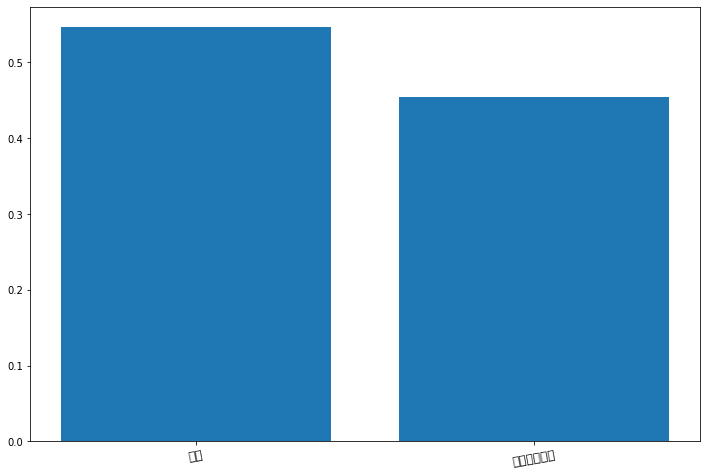

In [51]:
# TODO：导入一个有'feature_importances_'的监督学习模型

# TODO：在训练集上训练一个监督学习模型，初始化
model = RandomForestClassifier(max_depth=50, min_samples_split=8)
# TODO: fit 训练集
model.fit(X_train,y_train)


import matplotlib.pyplot as plt
features = ["天气", "计划起飞时间"]

feature_important = model.feature_importances_
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(features)),feature_important)
plt.xticks(np.arange(len(features)),features,fontsize=12,rotation=10)
plt.show()


#### 问题6：哪一个特征更加重要？这符合你的直觉吗？谈谈你在平时的项目中在做特征工程时，对于使用符合直觉的特征的看法，可以举例说明。

回答问题：
1. 天气因素（左侧图）更重要。
2. 符合直觉
3. 采用符合直觉的特征时，能让我们更快更准确的处理特征（例如：归一化，独热编码等)， 从而选择模型，修改参数。

## 模型对比

目前为止，我们已经对一个实际问题的复杂的数据进行了处理，并抽取了一两个特征，然后进行了模型训练。你可以按照这个流程做更多的特征工程的工作。由于数据量大，我们已经做好了特征工程，同时我们也sample了部分数据，方便接下来对不同模型进行比较。

这一小节，我们要学习在具体业务场景经常使用的模型，梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）。GBDT在工业场景和各大数据挖掘比赛中都是非常流行的模型，在这里，我们尝试对这些流行对模型进行初探。

#### 问题7：通俗的解释什么是 梯度提升决策树 （Gradient Boosting Decison Tree，GBDT）？并列举其优缺点。

回答问题： GBDT 核心是每个新的决策树学习的是之前所有决策树的残差residual/梯度下降值

`Boosting`: 将弱model提升为强model，知错就改。

`Gradient Boosting`: Boosting思想下的一种函数优化方法。每次计算为了减少上一次的残差residual， 而非利用残差改变sample weights。通过多轮迭代,每轮迭代产生一个弱分类器，每个分类器在上一轮分类器的残差基础上进行训练。新分类器建立在残差residual减少的梯度方向上，使得loss function在梯度方向上减少从而得到新模型。

`sample`: 随机采样不放回策略

`model`: 多个分类回归决策树 Decision Tree CART。 决策树可以认为是 if-then 规则的集合，易于理解，可解释性强，预测速度快。同时，决策树算法相比于其他的算法需要更少的特征工程，比如可以不用做特征标准化，可以很好的处理字段缺失的数据，也可以不用关心特征间是否相互依赖等。决策树能够自动组合多个特征。单独使用决策树算法时，有容易过拟合缺点。所幸的是，通过各种方法，抑制决策树的复杂性，降低单颗决策树的拟合能力，再通过梯度提升的方法集成多个决策树，最终能够很好的解决过拟合的问题。对弱分类器的要求一般是足够简单，并且是低方差和高偏差的。因为训练的过程是通过降低偏差来不断提高最终分类器的精度。弱分类器一般会选择为CART TREE（也就是分类回归树）。由于上述高偏差和简单的要求 每个分类回归树的深度不会很深。

`predict`: 每个分类回归Decision Tree都给出预测值，最终预测值是将所有结果累加起来，或者加权累加起来。

`用途`: Classification， Regression 

`优点`: 

- 防止过拟合。GBDT的最大好处在于，每一步的残差计算其实变相地增大了分错实例(instance)的权重，而已经分对的实例(instance)则都趋向于0。这样后面的树就能越来越专注那些前面被分错的实例(instance)。
- 它的非线性变换比较多，表达能力强，而且不需要做复杂的特征工程和特征变换。
- 适合低维度数据
- 预测准确率高
- GBDT基于树模型，继承了树模型的优点。 如果数据中有不相关的 feature，没什么干扰，顶多这个 feature 不出现在树的节点里。
- 可以灵活处理各种类型的数据，包括连续值和离散值。
- 在相对少的调参时间情况下，预测的准备率也可以比较高。这个是相对SVM来说的。
- 使用一些健壮的损失函数，对异常值的鲁棒性非常强。

`缺点`: 

- 每个弱学习器之间是依次学习的关系，难以并行训练。
- 不太适合高维稀疏特征， 如果数据维度较高时会加大算法的计算复杂度

https://yifdu.github.io/2019/03/23/GBDT%E8%A6%81%E7%82%B9/

#### 问题8：目前比较流行的 `GBDT`的变种有 [Xgboost](https://xgboost.readthedocs.io/en/latest/) 和 [LightGBM](https://lightgbm.readthedocs.io/en/latest/)，请比较这三个梯度提升模型，列举他们各自的特点? （你可以参考一些文档，并给出你的引用出处）

回答问题：三种都属于Boosting算法。GBDT是机器学习算法，XGBoost和LightGBM是GBDT的算法实现。LightGBM是XGBoost的改进版，相比于前者，它添加了很多新的方法来改进模型，包括:并行方案、基于梯度的单边检测、排他性特征捆绑等。
#### 1. GBDT:

`原理`: 

- 训练基分类器时采用串行的方式，各个基分类器之间有依赖。
- 原始的Boost算法是在算法开始的时候，为每一个样本赋上一个权重值，初始的时候，大家都是一样重要的。在每一步训练中得到的模型，会使得数据点的估计有对有错，我们就在每一步结束后，增加分错的点的权重，减少分对的点的权重，这样使得某些点如果老是被分错，那么就会被“严重关注”，也就被赋上一个很高的权重。然后等进行了N次迭代（由用户指定），将会得到N个简单的分类器（basic learner），然后我们将它们组合起来（比如说可以对它们进行加权、或者让它们进行投票等），得到一个最终的模型。
- GBDT与传统的Boosting区别较大，它的每一次计算都是为了减少上一次的残差，而为了消除残差，我们可以在残差减小的梯度方向上建立模型,所以说，在GradientBoost中，每个新的模型的建立是为了使得之前的模型的残差往梯度下降的方法，与传统的Boosting中关注正确错误的样本加权有着很大的区别。
- 在GradientBoosting算法中，关键就是利用损失函数的负梯度方向在当前模型的值作为残差的近似值，进而拟合一棵CART回归树。
- GBDT的会累加所有树的结果，而这种累加是无法通过分类完成的，因此GBDT的树都是CART回归树，而不是分类树（尽管GBDT调整后也可以用于分类但不代表GBDT的树为分类树）。

`优点`:
- 灵活的处理各种类型的数据
- 在相对较少的调参时间下，预测的准确度较高

`缺点`: 
- 基学习器之前存在串行关系，难以并行训练数据


#### 2. Xgboost

`原理`:
- XGBoost 是GBDT的一个变种，最大的区别是xgboost通过对目标函数做二阶泰勒展开，从而求出下一步要拟合的树的叶子节点权重（需要先确定树的结构），从而根据损失函数求出每一次分裂节点的损失减小的大小，从而根据分裂损失选择合适的属性进行分裂。

- 这个利用二阶展开的到的损失函数公式与分裂节点的过程是息息相关的。先遍历所有节点的所有属性进行分裂，假设选择了这个a属性的一个取值作为分裂节点，根据泰勒展开求得的公式可计算该树结构各个叶子节点的权重，从而计算损失减小的程度，从而综合各个属性选择使得损失减小最大的那个特征作为当前节点的分裂属性。依次类推，直到满足终止条件。
- 

`XGBoost与GBDT区别`: 
- 传统GBDT以CART作为基分类器，xgboost还支持线性分类器，这个时候xgboost相当于带L1和L2正则化项的逻辑斯蒂回归（分类问题）或者线性回归（回归问题）。
- 传统GBDT在优化时只用到一阶导数信息，xgboost则对代价函数进行了二阶泰勒展开，同时用到了一阶和二阶导数。顺便提一下，xgboost工具支持自定义代价函数，只要函数可一阶和二阶求导。
- xgboost在代价函数里加入了正则项，用于控制模型的复杂度。正则项里包含了树的叶子节点个数、每个叶子节点上输出的score的L2模的平方和。从Bias-variance tradeoff角度来讲，正则项降低了模型的variance，使学习出来的模型更加简单，防止过拟合，这也是xgboost优于传统GBDT的一个特性。
- Shrinkage（缩减），相当于学习速率（xgboost中的eta）。xgboost在进行完一次迭代后，会将叶子节点的权重乘上该系数，主要是为了削弱每棵树的影响，让后面有更大的学习空间。实际应用中，一般把eta设置得小一点，然后迭代次数设置得大一点。（传统GBDT的实现也有学习速率）
- 列抽样（column subsampling）。xgboost借鉴了随机森林的做法，支持列抽样，不仅能降低过拟合，还能减少计算，这也是xgboost异于传统gbdt的一个特性。
- 对缺失值的处理。对于特征的值有缺失的样本，xgboost可以自动学习出它的分裂方向。对于在训练过程中遇到的缺失值，xgboost将其分别归到左子树和右子树分别计算损失，选取较优的哪一个。如果在训练中没有缺失值，在预测时遇到缺失值，就默认分到右子树。
- xgboost工具支持并行。注意xgboost的并行不是tree粒度的并行，xgboost也是一次迭代完才能进行下一次迭代的（第t次迭代的代价函数里包含了前面t-1次迭代的预测值）。xgboost的并行是在特征粒度上的。我们知道，决策树的学习最耗时的一个步骤就是对特征的值进行排序（因为要确定最佳分割点），xgboost在训练之前，预先对数据进行了排序，然后保存为block结构，后面的迭代中重复地使用这个结构，大大减小计算量。这个block结构也使得并行成为了可能，在进行节点的分裂时，需要计算每个特征的增益，最终选增益最大的那个特征去做分裂，那么各个特征的增益计算就可以开多线程进行。
- 可并行的近似直方图算法。树节点在进行分裂时，我们需要计算每个特征的每个分割点对应的增益，即用贪心法枚举所有可能的分割点。当数据无法一次载入内存或者在分布式情况下，贪心算法效率就会变得很低，所以xgboost还提出了一种可并行的近似直方图算法，用于高效地生成候选的分割点。

`优点`:
- 在使用CART作为基分类器时，XGBoost显式地加入了正则项来控制模型的复杂度，有利于防止过拟合，从而提高模型的泛化能力。
- XGBoost实现了并行方式的决策树提升(Tree Boosting)，从而能够快速准确地解决各种数据科学问题。


####  3. LightGBM

`原理`:

- 

`lightGBM与XGBoost区别`: 
- 决策树算法：由于在决策树在每一次选择节点特征的过程中，要遍历所有的属性的所有取值并选择一个较好的。XGBoost使用的是pre-sorted算法（对所有特征都按照特征的数值进行预排序，在遍历分割点的时候用O(data)的代价找到一个特征上的最好分割点），能够更精确的找到数据分隔点；（xgboost的分布式实现也是基于直方图的，利于并行）。LightGBM使用的是histogram算法（X发给类似一种分桶算法），占用的内存更低，数据分隔的复杂度更低。
- 决策树生长策略： XGBoost采用的是level-wise生长策略，能够同时分裂同一层的叶子，从而进行多线程优化，也好控制模型复杂度，不容易过拟合；但实际上Level-wise是一种低效的算法，它不加区分的对待同一层的叶子，带来了很多没必要的开销，因为实际上很多叶子的分裂增益较低，没必要进行搜索和分裂。LightGBM采用leaf-wise生长策略，每次从当前所有叶子中找到分裂增益最大（一般也是数据量最大）的一个叶子，然后分裂，如此循环；但会生长出比较深的决策树，产生过拟合。因此 LightGBM 在leaf-wise之上增加了一个最大深度的限制，在保证高效率的同时防止过拟合。


`优点`:

- 训练时间缩短， 快速高效，低内存占用，高准确度。
- 支持并行和大规模数据处理。


参考： 

1. [gbdt/xgboost/lightGBM比较](https://marian5211.github.io/2018/03/12/%E3%80%90%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E3%80%91gbdt-xgboost-lightGBM%E6%AF%94%E8%BE%83/)
2. [XGBoost, LightGBM性能大对比](https://zhuanlan.zhihu.com/p/24498293)

我们已经预先对该数据做了充分的特征工程，然后 `sample` 出了部分数据。数据在路径 `./data/`下面，有训练集`train.csv`和测试集`test.csv`

In [52]:
# 直接运行读取数据，并分别得到 X 和 Y 的数据

# 处理训练集
train_x = pd.read_csv("./data/train.csv")
train_y = train_x["飞机延误目标"].values
del(train_x["飞机延误目标"])
# 处理测试集
test_x = pd.read_csv("./data/test.csv")
test_y = test_x["飞机延误目标"].values
del(test_x["飞机延误目标"])

In [53]:
train_x.head()

,Unnamed: 0,出发机场,到达机场,航班编号,飞机编号,计划飞行时间,计划起飞时刻,航班月份,计划到达时刻,前序延误,起飞间隔,到达特情,出发特情,出发天气,出发气温,到达天气,到达气温,航空公司,航班性质
0,1438,393,149,16869,0.0,1.916667,3,5,5,0.458428,4.520489,0,0,97,0,25,0,73,1
1,124857,423,434,27063,0.0,1.916667,3,10,5,0.458428,4.520489,0,0,87,0,16,0,164,1
2,116794,1,230,11629,0.0,0.666667,9,9,9,0.458428,4.520489,0,0,82,0,64,0,57,0
3,705,320,261,3946,0.0,3.416667,8,5,11,0.458428,4.520489,0,0,64,0,97,0,32,1
4,1092,115,323,14414,0.0,1.416667,14,5,15,0.458428,4.520489,0,0,124,0,16,0,66,1


In [54]:
train_y

array([1, 0, 0, ..., 0, 0, 1])

### 对 gbdt 进行调参

按照上面简单模型构建部分的流程，先定义一个梯度提升决策树分类器 GradientBoostingClassifier，并设置里面固定参数；然后设置需要调优的参数，然后通过 网格搜索 `GridSearchCV` 进行搜索最优参数。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics




# TODO: 需要调的参数，比如 max_depth, n_estimators, learning_rate
cv_params = {'max_depth':[6,7,8], 'n_estimators': [50,100,200], 
          'learning_rate': [0.1,1,2]}


#TODO：设置 GBDT 分类器 GradientBoostingClassifier
model = GradientBoostingClassifier(loss = 'exponential')
# TODO: 设置 GridSearchCV
grid_cv = GridSearchCV(model, param_grid = cv_params, cv = 5, scoring = 'roc_auc')
# TODO: 模型训练
grid_cv.fit(train_x, train_y)

# TODO：在测试集上预测，并计算accuracy和f-score
best_model = grid_cv.best_estimator_
best_pred = best_model.predict(test_x)
f_score = fbeta_score(test_y, best_pred, beta = 0.5)
acc = accuracy_score(test_y, best_pred)


# TODO：打印最优参数
best_parameters = grid_cv.best_estimator_.get_params()
print(best_parameters)
print('Accuracy:', acc)
print('F-Score:', f_score)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'exponential', 'max_depth': 7, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Accuracy: 0.5041666666666667
F-Score: 0.04032258064516128


### 对 Xgboost 进行调参
关于xgboost 的参数设置和调参与gbdt类似，参数也是类似的，比如 `n_estimators`表示树的个数；`max_depth`表示构建树的深度，越大越容易过拟合；`gamma`表示用于控制是否后剪枝的参数；`reg_lambda`是用来控制模型复杂度的L2正则化的参数，值越大，模型越不容易过拟合，等等。由于数据量已经减少，这里你可以将参数设置的大一些，以提升模型的准确度，但要防止过拟合。

如果没有安装过xgboost，你需要先运行以下代码来安装 xgboost

In [ ]:
!pip install xgboost

In [57]:
### 使用Xgboost 进行训练和测试
import xgboost as xgb
import time


# TODO: 选择要调优的参数, 比如max_depth, n_estimator,learning_rate
cv_params = {'max_depth':[6,7,8], 'n_estimators': [50,100,200], 
          'learning_rate': [0.1,1,2]}
time_start = time.clock()
model = xgb.XGBClassifier()

grid_cv = GridSearchCV(model, param_grid=cv_params, cv = 5, scoring = 'roc_auc')
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算准确率
best_model = grid_cv.best_estimator_
# TODO：预测测试集的结果
predict_y = best_model.predict(test_x)
# TODO：计算 准确率

auc= accuracy_score(test_y, predict_y)
time_end = time.clock()
# 打印准确率结果
print("准确率：{}".format(auc))

# TODO：打印最优参数
best_parameters = grid_cv.best_estimator_.get_params()
print(best_parameters)
print('Time consumption:', time_end-time_start)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


准确率：0.504
{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 200, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': None, 'validate_parameters': False, 'verbosity': None}
Time consumption: 692.1708069999995


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [58]:
### 使用Xgboost 进行训练和测试
import xgboost as xgb
import time


# TODO: 选择要调优的参数, 比如max_depth, n_estimator,learning_rate
cv_params = {'learning_rate': [0.01, 0.05, 0.08, 0.1, 0.2, 0.3]}
time_start = time.clock()
model = xgb.XGBClassifier()

grid_cv = GridSearchCV(model, param_grid=cv_params, cv = 5, scoring = 'roc_auc')
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算准确率
best_model = grid_cv.best_estimator_
# TODO：预测测试集的结果
predict_y = best_model.predict(test_x)
# TODO：计算 准确率

auc = accuracy_score(test_y, predict_y)
time_end = time.clock()
# 打印准确率结果
print("准确率：{}".format(auc))

# TODO：打印最优参数
best_parameters = grid_cv.best_estimator_.get_params()
print(best_parameters)
print('Time consumption:', time_end-time_start)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


准确率：0.504
{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': 0.3, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': None, 'validate_parameters': False, 'verbosity': None}
Time consumption: 126.0378209999999


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [59]:
### 使用Xgboost 进行训练和测试
import xgboost as xgb
import time


# TODO: 选择要调优的参数, 比如max_depth, n_estimator,learning_rate
cv_params = {'n_estimators': [200,300,400,500],'learning_rate': [0.1], 'max_depth': [5,6, 7,9]}
time_start = time.clock()
model = xgb.XGBClassifier()

grid_cv = GridSearchCV(model, param_grid=cv_params, cv = 5, scoring = 'roc_auc')
grid_cv.fit(train_x, train_y)


# TODO：在测试集上预测，并计算准确率
best_model = grid_cv.best_estimator_
# TODO：预测测试集的结果
predict_y = best_model.predict(test_x)
# TODO：计算 准确率

auc = accuracy_score(test_y, predict_y)
time_end = time.clock()
# 打印准确率结果
print("准确率：{}".format(auc))

# TODO：打印最优参数
best_parameters = grid_cv.best_estimator_.get_params()
print(best_parameters)
print('Time consumption:', time_end-time_start)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


准确率：0.504
{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': None, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 9, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 400, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': None, 'validate_parameters': False, 'verbosity': None}
Time consumption: 1294.4089349999995


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


#### 问题9：在这个任务中，`GBDT`和`xgboost`的性能如何？哪一个更优？通过此次对比和调参过程，总结你对**梯度提升决策树**调参的经验与总结

回答问题：
##### 1. xgboost 所消耗时间短，性能更好: 

xgboost是Gradient Boosting的一种高阶系统实现。

`支持并行`: data事先排好序并以block的形式存储，利于并行计算。实现了一种分裂节点寻找的近似算法，用于加速和减小内存消耗。

`base_model`: 树，线性分类器

`优化loss function`: 对loss function 进行了二阶泰勒展开，同时用到了一阶和二阶求导。xgboost支持自定义代价函数（可一阶、二阶求导） 

`防止过拟合`: 允许使用column(feature) sampling来防止过拟合，借鉴了Random Forest的思想，sklearn里的gbm好像也有类似实现


#### 2. GBDT 调参经验与总结：

1. 首先使用model默认的参数，进行数据拟合。
2. Learning Rate和n_estimators: 选择一个较小的learning rate 如，[0.01，0.05, 0.1, 0.2]用GridSearchCV寻找最好的迭代次数n_estimators
3. 接下来对决策树的参数进行寻优，首先我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。
4. 回归到第2步调整设定learning rate和迭代次数n_estimators，注意两者的乘积保持不变，这里可以分析得到：通过减小步长可以提高泛化能力，但是步长设定过小，也会导致拟合效果反而变差，也就是说，步长不能设置的过小。

参考：
[GBDT要点](https://yifdu.github.io/2019/03/23/GBDT%E8%A6%81%E7%82%B9/)

# 自我学习总结：

## 1. Flight Delay 数据的学习
##### 1. 总结
`imbalanced data classification`: 这种航班延误的数据，通常为不平衡的。延误的航班总是少数。不平衡数据集指的是数据集各个类别的样本量极不均衡。以二分类问题为例，假设正类的样本数量远大于负类的样本数量，通常情况下通常情况下把多数类样本的比例接近100:1这种情况下的数据称为不平衡数据。

## 2. Bagging: 

##### 1. 总结： 

提升单个机器学习算法的稳定性，准确性

对于稳定的模型来说，Bagging并不会工作地很好，而Boosting可得会有帮助。

`model`: 通常运用在Desicion Tree中(容易overfitting，但是bias低)。但是可以运用到任何Machine Learning 算法中

`overfitting`: 减少variance，从而减少overfitting


##### 2. 过程：

`抽样-sample`： 对于给定的训练样本S,每轮从训练样本S中采用有放回抽样(Booststraping)的方式抽取M个训练样本,共进行n轮，得到了n个样本集合，需要注意的是这里的n个训练集之间是相互独立的。

`model`：在获取了样本集合之后，每次使用一个样本集合得到一个预测模型，对于n个样本集合来说，我们总共可以得到n个预测模型。

`predict`：如果我们需要解决的是分类问题，那么我们可以对前面得到的n个模型采用投票的方式得到分类的结果，对于回归问题来说，我们可以采用计算模型均值的方法来作为最终预测的结果。

`when to use`：
- if small changes to the training set cause large changes in the learned classifier.（也就是说如果训练集稍微有所改变就会导致分类器性能比较大大变化那么我们可以采用bagging这种集成方法. 
- If the learning algorithm is unstable, then Bagging almost always improves performance.(当学习算法不稳定的时候，Bagging这种方法通常可以改善模型的性能)
- Bagging更适合应用到具有很小偏差（small bias）地分类方法中（例如：Desicion Tree)。Bagging减小方差通过平均方法（averaging），如果你的模型具有很高的偏差，Bagging并不会对模型有很大的影响，就好比是一堆臭皮匠平均下来还是臭皮匠。但是，如果你的模型个个都是诸葛亮（都很好地拟合训练集，高方差），那么如果我把这些诸葛亮的决策结果平均下来，会产生很好地效果。


`how to use`：指定基分类器，并指定了子集的规模大小

``` python
    from sklearn.ensemble import BaggingClassifier
    from sklearn.neighbors import KNeighborsClassifier
    bag = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5) 
    bag = BaggingClassifier(base_estimator=tree,n_estimators=500,
                        max_samples=1.0,max_features=1.0, bootstrap=True,
                        bootstrap_features=False, n_jobs=1, random_state=1)
    
```

##### 2. Random Forest: 

`Random Forest 与 Bagging 区别`: 训练单个决策树的时候并没有用全部的特征，我们只用了特征的子集。随机森林在生成决策树的时候用随机选择的特征。之所以这么做的原因是，如果训练集中的几个特征对输出的结果有很强的预测性，那么这些特征会被每个决策树所应用，这样会导致树之间具有相关性，这样并不会减小模型的方差。

`model` = desicion tree

`how to use`：
``` python
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, criterion='gini', max_features='sqrt', max_depth=None, min_samples_split=2, bootstrap=True, n_jobs=1, random_state=1)
```


## 3. Boosting: 

##### 1. 总结

- `模型`: 集合多个base classifier (weak learners)，从而使得总体()性能好于单个
- 对于稳定的模型来说，Bagging并不会工作地很好，而Boosting可得会有帮助。
- `AdaBoost`: adaptive boosting 广泛使用
- `适用`: Classfication， Regression 
- `Boosting与Bagging区别`: Boosting的base分类器是按顺序训练的（in sequence），训练每个base分类器时所使用的训练集是加权重的，而训练集中的每个样本的权重系数取决于前一个base分类器的性能。如果前一个base分类器错误分类地样本点，那么这个样本点在下一个base分类器训练时会有一个更大的权重。一旦训练完所有的base分类器，我们组合所有的分类器给出最终的预测结果。

- 对于稳定的模型来说，Bagging并不会工作地很好，而Boosting可得会有帮助。如果在训练集上有noisy数据，Boosting会很快地过拟合，降低模型的性能，而Bagging不存在这样地问题。

##### 2. Code sample


- `base model` = desicion tree

- `model` = desicion tree

- `how to use`：
``` python
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(base_estimator=tree, n_estimators=1000, learning_rate=0.1, random_state=0)
```



# 参考

1. https://www.jianshu.com/p/c4bf8821af19
2. https://blog.csdn.net/xlinsist/article/details/51475345
3. https://www.cnblogs.com/expttt/articles/9311062.html
4. https://www.zhihu.com/question/26726794
5. 